Developed by Julianna Schneider for CS487, modified for the Davidson Academy's Programming Club

# Welcome to an Intro to Deep Learning using Keras!
This short tutorial will introduce the structure of a deep learning model built with Keras in Google Colab. This tutorial's example problem is the XOR problem: a dataset containing coordinates satisyfing the XOR condition with some slight noise introduced. Our goal is to build and train a model that accurately classifies sets of XOR coordinates. 

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks 

# Data Generation

Here we generate our XOR dataset by establishing upper and lower limits for the X and O classes and randomly selecting coordinates within said range to populate each quadrant. Look closely at the output graph: there is overlap between the classes along the axes. This is overlap is what will challenge our basic deep learning model to learn effectively without overfitting, which is when a model memorizes the right answers for the training data instead of actually *learning* how to classifying novel coordinates. 


Some terminology to know: 

Epoch - the number of times we feed our training data into our model. Think of it like the number of hours we want our model to study.

Batch Size - the number of samples processed before our model is updated. Think of it as the number of books you read before updating your understanding on a topic. 

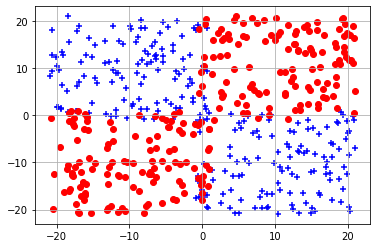

In [ ]:
#set up number of training samples
N = 250
#number of epochs
epoch = 10
#batch size
batchSize = 5

#Establish upper and lower bounds on input probabilities
Uh = 20 #upper bound
Ul = 1 #lower bound

#setup the O-class (first and third quadrant)
O1 = np.random.uniform(-Ul, (Uh+1), (125, 2))
O3 = np.random.uniform(-(Uh+1), Ul, (125, 2))
O = np.concatenate((O1, O3), axis=0)

#setup the X-class (second and fourth quadrant)
X2 = np.random.uniform(-Ul, (Uh+1), (125, 2))
for i, coordinate in enumerate(X2):
  X2[i,0] = -1*coordinate[0]
X4 = np.random.uniform(-(Uh+1), Ul, (125, 2))
for i, coordinate in enumerate(X4):
  X4[i,0] = -1*coordinate[0]
X = np.concatenate((X2, X4), axis=0)

#plot the X-class and O-class
plt.scatter(X[:,0], X[:,1], marker="+", c="blue", label="X-class")
plt.scatter(O[:,0], O[:,1], marker="o", c="red", label="O-class")
plt.grid(True)

# Training Data Label Establishment 

Here we set up label datasets to matching the training input we generated in the last code block. Since we're taking a supervised approach to this task, the datasets from the preivous code block will be the model's input off which it will make a prediction. The datasets generated below will be the answer key off which our model checks whether its prediction was correct and adjusts its weights and biases accordingly. 


In [ ]:
#set up the training samples from the X-class and O-class
x_train = np.concatenate((O, X), axis=0)#compile the x and o classs into the x_train array

# set up the labels [1 0] for each x_class and [0 1] for each o class
y_o = np.full((N, 2), [0, 1])
y_x = np.full((N, 2), [1, 0])

#set up training labels
y_train = np.concatenate((y_o, y_x), axis=0)# compile the labels into the y_train array for class labels


# Model Setup

Here we build our model using Keras. Our model is rather simple, consisting of only a single hidden layer with a ReLU activation function applied to the end. Take a look at the output to learn more about the model's structure, number of parameters, etc. 

In [ ]:
# set up your model as sequential
model = keras.Sequential()

# specify input dimensionality
model.add(keras.Input(shape=(2)))

# add a dense layer with 8 nodes and relu activations. Note: the input is two-dimensional
model.add(layers.Dense(8, activation="relu", name="layer1"))

# add another dense layer as the output layer with sigmoid activations. Note: output will be two-dimensional
model.add(layers.Dense(2, activation="sigmoid", name="outputlayer"))

# print the shape, summary, configuration, and initial weights of your network
model.summary()
print("Number of weights: ", len(model.weights))
print("Initial weights: ", model.weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 8)                 24        
                                                                 
 outputlayer (Dense)         (None, 2)                 18        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
Number of weights:  4
Initial weights:  [<tf.Variable 'layer1/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-0.4834956 , -0.2986851 ,  0.6113055 , -0.44979993,  0.6040907 ,
         0.5165477 , -0.04085839,  0.7063345 ],
       [-0.45890883, -0.20049447, -0.42157334, -0.37298635, -0.73033136,
         0.25159442,  0.05686963, -0.60826147]], dtype=float32)>, <tf.Variable 'layer1/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0

# Model Training

Here we choose our loss function and optimizer: this tells our model how to learn from its training data. We then tell our model to train and update us as it learns via the output.

In [ ]:
# setup the loss as binary cross entropy, optimizer as adam, and metrics as accuracy for your model and compile
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train your model using x_train, y_train, and for a certain number of epochs, with a batch_size of n, and set verbose to 1
model.fit(x=x_train, y = y_train, batch_size = batchSize, epochs=epoch, verbose=1)

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 1.1060 - accuracy: 0.4380
Epoch 2/10
100/100 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.6640
Epoch 3/10
100/100 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7640
Epoch 4/10
100/100 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8080
Epoch 5/10
100/100 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8280
Epoch 6/10
100/100 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8420
Epoch 7/10
100/100 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8600
Epoch 8/10
100/100 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8700
Epoch 9/10
100/100 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8700
Epoch 10/10
100/100 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8860

# Model Evaluation

Here we evaluate the model's accuracy by showing it a new set of XOR coordinates and assessing it's accuracy. If our model performs at the same high accuracy on this new data (the testing data) as it did on the old data it learned from (the training data), then we know it isn't overfitting and is actually learning instead of memorizing. 


In [ ]:
# setup 300 samples as test data (150 for x class and 150 for o class)
N_test = 150
#setup the O-class (first and third quadrant)
O1_test = np.random.uniform(-Ul, (Uh+1), (75, 2))
O3_test = np.random.uniform(-(Uh+1), Ul, (75, 2))
O_test = np.concatenate((O1_test, O3_test), axis=0)

#setup the X-class (second and fourth quadrant)
X2_test = np.random.uniform(-Ul, (Uh+1), (75, 2))
for i, coordinate in enumerate(X2_test):
  X2_test[i,0] = -1*coordinate[0]
X4_test = np.random.uniform(-(Uh+1), Ul, (75, 2))
for i, coordinate in enumerate(X4_test):
  X4_test[i,0] = -1*coordinate[0]
X_test = np.concatenate((X2_test, X4_test), axis=0)

#set up the testing samples from the X-class and O-class
x_test = np.concatenate((O_test, X_test), axis=0)#compile the x and o classs into the x_test array

# set up the labels [1 0] for each x_class and [0 1] for each o class
y_o_test = np.full((N_test, 2), [0, 1])
y_x_test = np.full((N_test, 2), [1, 0])

#set up evaluation labels
y_test = np.concatenate((y_o_test, y_x_test), axis=0)# compile the labels into the y_test array for class labels

# evaluate the model
score = model.evaluate(x=x_test, y=y_test, batch_size=batchSize, verbose=1)
print(score)

60/60 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.9100
[0.24649061262607574, 0.9100000262260437]


# Remaining Inaccuracies

Although our model achieved a significantly high accuracy, there are still classification cases in which it struggles. The output from the code cell below highlights these cases in yellow. These misclassificaiotns are conglomerated along the axes because of the noise we introduced during the Data Generation phase: by making the datasets for each quadrant deviate slightly from perfect XOR adherence, we simulated the challenges that models run into when dealing with more complex, real-world issues where different classes are not always clear cut. 

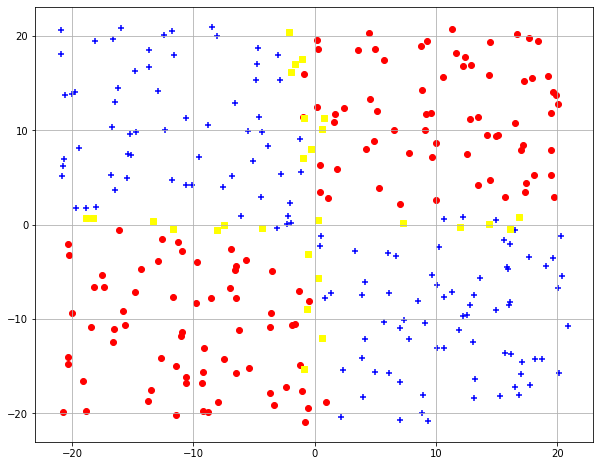

In [ ]:
# Iterate through the model's predictions for the test data and compare them to the labels
# Log false positives in the false positives array and log false negatives in the false negatives array
predictions = model.predict(x = x_test)
misclassification = []
for i, sample in enumerate(x_test):
  if((predictions[i][0]>predictions[i][1]) and (y_test[i][0]<y_test[i][1])):
    misclassification.append(sample)
  elif((predictions[i][0]<predictions[i][1]) and (y_test[i][0]>y_test[i][1])):
    misclassification.append(sample)

misclassificationArr = np.array(misclassification)
#plot the X-class and O-class


plt.figure(figsize=(10, 8))
plt.grid(True)
display(plt.scatter(X_test[:,0], X_test[:,1], marker="+", c="blue", label="X-class"))
display(plt.scatter(O_test[:,0], O_test[:,1], marker="o", c="red", label="O-class"))
display(plt.scatter(misclassificationArr[:,0], misclassificationArr[:,1], marker="s", c="yellow", label="Misclassification"))


# Enichment: Model Development Report

**The following is a record of how this model was developed and the thought process behind hyperparameter choices. This is beyond the introducotry scope of the tutorial, but serves as enrichment for those interested in learning more.**

I began the process of fine tuning my hyperparameters with a batch size of 25 and 10 epochs. These hyper parameters achieved a 0.6232 accuracy on the training data and 0.6567 on the testing data. Since I observed a relatively steady increase in accuracy from the 1st epoch to the 10th, I decided to increase the number of epochs to 15, which resulted in a 0.6832 accuracy in the training data and 0.6500 accuracy on the testing data. In this iteration the accuracy for each epoch did not increase in the linear fashion observed in the last iteration: therefore, I increased the epochs to 20 to see whether the instability of the accuracies would increase - indicating increasing the epochs would no longer be a helpful hyperparameter change - or whether the training set randomization resulted in the observed differences. Increasing the number of epochs to 20 resulted in a 0.9169 accuracy on the training data and 0.9067 accuracy on the testing data. The training output revealed that the accuracy from epochs 1 to 10 and epochs 16 to 20 did not increase in the reliable linear fashion observed between epochs 10 to 16; however, overall, the 20 epoch hyper parameter increased the models’ accuracy. I ran the model on five more randomized testing sets to evaluate whether it’s accurate predictions were reliable or simply overfitted to the testing data and recorded accuracies of 0.8867, 0.9033, 0.9167, 0.8967, and 0.9233. As I continued to tweak the number of epochs and batch size to test out various combinations and then returning to the 20 epochs and batch size of 25 settings, I encountered certain cases where these hyper parameters would cause performance to drop severely. In one instance the maximum accuracy achieved on the training set was 0.5318 and 0.5167 on the testing data set. The graph below provides a visualization of how many points were misclassified - depicted in yellow - in comparison to how many were properly classified. Based on the aforementioned lack of linearity in accuracy increase the number of epochs grew, I suspected that the high number of epochs was causing overfitting.

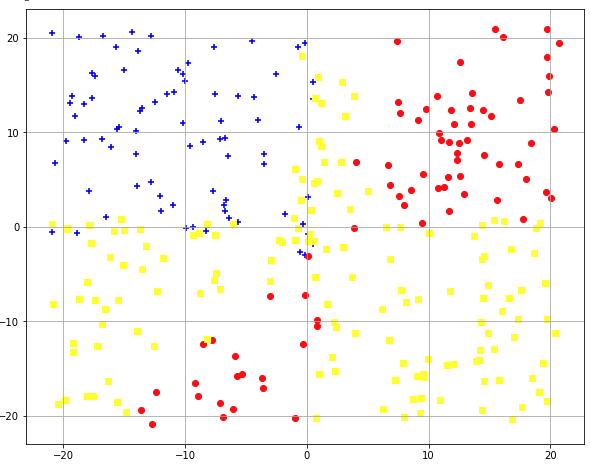
￼

Consequently, I began a new set of experiments. I set the number of epochs to 10, to address potential overfitting from excessive training, and batch size to 10, in hopes that the smaller batch size would help my model generalize better. The model achieved a training data accuracy of 0.8870 and testing data accuracy of 0.9367. I ran five different, randomized test data sets to test this model’s resiliency and recorded accuracies of 0.9033, 0.8867, 0.9033, 0.9133, and 0.9133, respectively. I once again retrained the model a few times with these same hyper parameters to see whether it would suffer from the same drop in performance as my previous model. The lowest training and testing data accuracies achieved were 0.6765 and 0.7567, respectively. The graph below depicts the classification results from this test. 

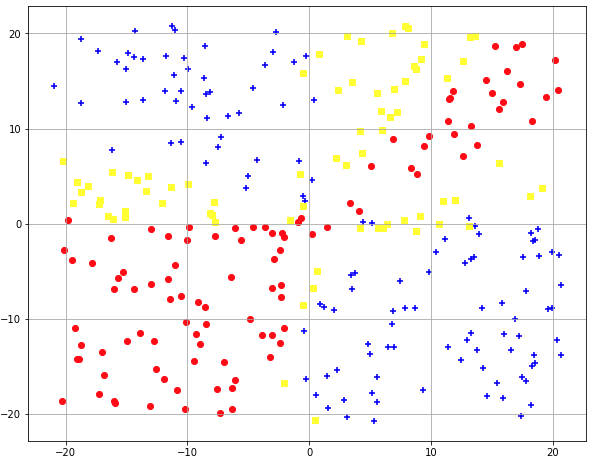
￼

In the first quadrant particularly, there seemed to be evidence of overfitting. So I dropped my batch size to 5 and achieved a training data accuracy of 0.9184 and testing data accuracy of 0.8900. I ran five different, randomized test data sets to test this model’s resiliency and recorded accuracies of 0.9067, 0.9133, 0.8967, 0.9067, and 0.9100. Although these scores are comparable to the prior hyper parameters’ scores, I decided to stick with a batch size of 5 and epoch number of 10 as when I retrained the model as in previous tests, I did not encounter any severe drop in performance: the lowest training data and testing data accuracies I recorded were 0.8685 and 0.8700, respectively. This is the graph from this lowest accuracy test , which indicates no severe misclassification. 

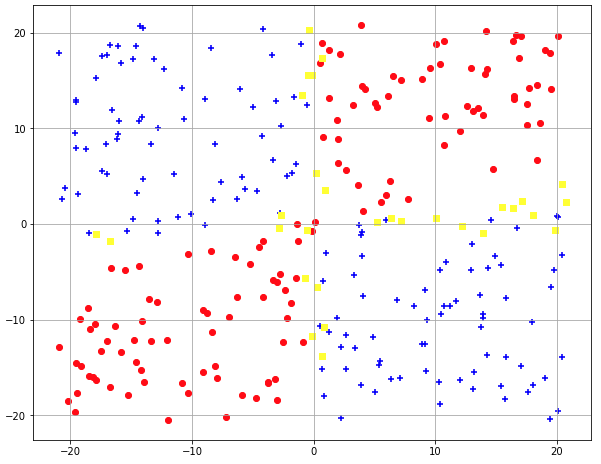
￼
